In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('Retail.csv')
from sklearn.preprocessing import StandardScaler,LabelEncoder
catcols = dataset.select_dtypes(include=['object']).columns
dataframe = dataset.copy()
numcols = dataset.select_dtypes(exclude=['object']).columns
dataframe.isnull().sum()
dataframe.Item_Weight = dataframe.Item_Weight.fillna(value=dataframe.Item_Weight.mean())
dataframe.Outlet_Size = dataframe.Outlet_Size.fillna(value=dataframe.Outlet_Size.mode().values[0])
dataframe.isnull().sum()
encoder = LabelEncoder()
for col in catcols:
 dataframe[col] = encoder.fit_transform(dataframe[col])
scaler = StandardScaler()
dataframe = scaler.fit_transform(dataframe)
dataframe = pd.DataFrame(dataframe,columns=dataset.columns)
dataframe.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-1.388514,-8.418717e-01,-0.572844,-0.970732,-0.766479,1.747454,1.507813,0.139541,-0.284581,-1.369334,-0.252658,0.910601
1,-1.717991,-1.641706e+00,0.978092,-0.908111,1.608963,-1.489023,-0.607071,1.334103,-0.284581,1.091569,1.002972,-1.018440
2,-0.262057,1.098554e+00,-0.572844,-0.956917,0.658786,0.010040,1.507813,0.139541,-0.284581,-1.369334,-0.252658,-0.049238
3,0.759769,1.500838e+00,0.978092,-1.281758,-0.291391,0.660050,-1.664513,0.020085,-0.284581,1.091569,-1.508289,-0.849103
4,1.151580,-9.294275e-01,-0.572844,-1.281758,0.421242,-1.399220,-1.312032,-1.293934,-1.950437,1.091569,-0.252658,-0.695373
5,-0.048342,-5.827538e-01,0.978092,-1.281758,-1.716656,-1.438734,-0.607071,1.334103,-0.284581,1.091569,1.002972,-0.952110
6,-0.186366,1.875007e-01,0.978092,-1.034813,1.371418,-1.338238,-1.312032,-1.293934,-1.950437,1.091569,-0.252658,-1.076967
7,-0.092866,4.035383e-14,-0.572844,1.188838,1.371418,-0.533641,0.097891,-1.532846,-0.284581,1.091569,2.258603,1.079158
8,-0.756273,7.909259e-01,0.978092,-0.958331,-0.528935,-0.706908,0.802852,0.497909,-0.284581,-0.138882,-0.252658,-0.647381
9,0.468137,1.500838e+00,0.978092,0.548845,-0.528935,0.752008,-0.959551,1.095190,-0.284581,-0.138882,-0.252658,1.482212


Covariance : 
 [[ 1.0001  0.0445 -0.0981 -0.0255 -0.018   0.0129 -0.0086 -0.0128  0.0014  0.0037 -0.0012  0.0029]
 [ 0.0445  1.0001 -0.0173 -0.012   0.028   0.0248 -0.008  -0.0083 -0.0072  0.0041 -0.0006  0.0116]
 [-0.0981 -0.0173  1.0001  0.034  -0.116  -0.0009 -0.0024 -0.0002 -0.0121 -0.0041 -0.0042  0.0098]
 [-0.0255 -0.012   0.034   1.0001 -0.0353 -0.0013 -0.1005 -0.0748  0.0693 -0.0281 -0.1735 -0.1286]
 [-0.018   0.028  -0.116  -0.0353  1.0001  0.0327  0.0017  0.005  -0.0019  0.0031  0.0031  0.017 ]
 [ 0.0129  0.0248 -0.0009 -0.0013  0.0327  1.0001  0.0033  0.005   0.0061  0.0002 -0.002   0.5676]
 [-0.0086 -0.008  -0.0024 -0.1005  0.0017  0.0033  1.0001  0.079   0.5047 -0.7163  0.0999  0.1623]
 [-0.0128 -0.0083 -0.0002 -0.0748  0.005   0.005   0.079   1.0001  0.1934 -0.0892 -0.1223 -0.0491]
 [ 0.0014 -0.0072 -0.0121  0.0693 -0.0019  0.0061  0.5047  0.1934  1.0001 -0.6144 -0.2015 -0.0862]
 [ 0.0037  0.0041 -0.0041 -0.0281  0.0031  0.0002 -0.7163 -0.0892 -0.6144  1.0001  0.4673  0.0

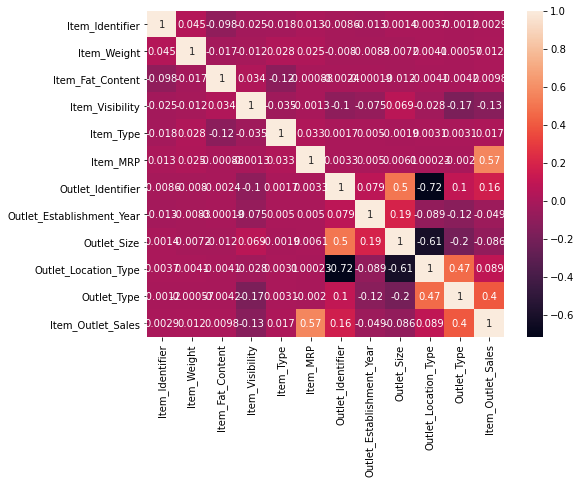

In [2]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(dataframe.corr(),annot=True)
with np.printoptions(precision=4,suppress=True,linewidth=150):
 print("Covariance : \n",dataframe.cov().values)

In [5]:
from factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
chi2,p = calculate_bartlett_sphericity(dataframe)
print("Bartlett Test of Sphericity")
print("Chi squared value : ",chi2)
print("p value : ",p)
kmo_all,kmo_model = calculate_kmo(dataframe)
print("KMO Test Statistic : ",kmo_model)

Bartlett Test of Sphericity
Chi squared value :  25682.08431899273
p value :  0.0
KMO Test Statistic :  0.4607838556080743


[[ 1.0001  0.0445 -0.0981 -0.0255 -0.018   0.0129 -0.0086 -0.0128  0.0014  0.0037 -0.0012  0.0029]
 [ 0.0445  1.0001 -0.0173 -0.012   0.028   0.0248 -0.008  -0.0083 -0.0072  0.0041 -0.0006  0.0116]
 [-0.0981 -0.0173  1.0001  0.034  -0.116  -0.0009 -0.0024 -0.0002 -0.0121 -0.0041 -0.0042  0.0098]
 [-0.0255 -0.012   0.034   1.0001 -0.0353 -0.0013 -0.1005 -0.0748  0.0693 -0.0281 -0.1735 -0.1286]
 [-0.018   0.028  -0.116  -0.0353  1.0001  0.0327  0.0017  0.005  -0.0019  0.0031  0.0031  0.017 ]
 [ 0.0129  0.0248 -0.0009 -0.0013  0.0327  1.0001  0.0033  0.005   0.0061  0.0002 -0.002   0.5676]
 [-0.0086 -0.008  -0.0024 -0.1005  0.0017  0.0033  1.0001  0.079   0.5047 -0.7163  0.0999  0.1623]
 [-0.0128 -0.0083 -0.0002 -0.0748  0.005   0.005   0.079   1.0001  0.1934 -0.0892 -0.1223 -0.0491]
 [ 0.0014 -0.0072 -0.0121  0.0693 -0.0019  0.0061  0.5047  0.1934  1.0001 -0.6144 -0.2015 -0.0862]
 [ 0.0037  0.0041 -0.0041 -0.0281  0.0031  0.0002 -0.7163 -0.0892 -0.6144  1.0001  0.4673  0.0894]
 [-0.0012 

Text(0.5, 1.0, 'Scree plot')

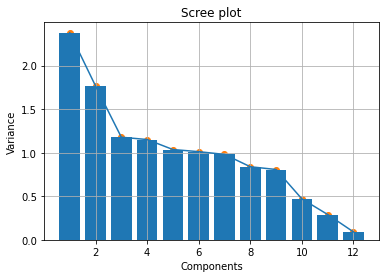

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(dataframe)
with np.printoptions(precision=4,suppress=True,linewidth=150):
 print(pca.get_covariance())
plt.plot(range(1,dataframe.shape[1]+1),pca.explained_variance_)
plt.bar(range(1,dataframe.shape[1]+1),pca.explained_variance_)
plt.scatter(range(1,dataframe.shape[1]+1),pca.explained_variance_)
plt.grid()
plt.xlabel('Components')
plt.ylabel('Variance')
plt.title('Scree plot')

In [7]:
pca = PCA(n_components=6)
pca.fit(dataframe)
print(pd.DataFrame(pca.components_,columns=dataframe.columns))
with np.printoptions(precision=5,suppress=True):
 print(pd.DataFrame(pca.explained_variance_,columns=['Eigen Values']))
with np.printoptions(precision=5,suppress=True):
 print(pd.DataFrame(pca.explained_variance_ratio_,columns=['Explained Variance Ratio']))
print("Cummulative Var : ",pca.explained_variance_ratio_.sum())

   Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0         0.007141     0.010968          0.001310        -0.046825   0.005728   
1         0.016678     0.027764         -0.017117        -0.233483   0.051105   
2        -0.309850    -0.140951          0.518267         0.479081  -0.347353   
3         0.309086     0.271842         -0.413920         0.308933   0.353605   
4        -0.521897    -0.257909          0.013127        -0.221407   0.415515   
5        -0.402582    -0.288290         -0.195094         0.282690   0.483678   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  0.052830          -0.470710                  -0.168421    -0.519817   
1  0.490680           0.339744                  -0.011903     0.085465   
2  0.381834          -0.147412                  -0.091144    -0.003101   
3  0.447817          -0.251926                   0.018279    -0.005538   
4  0.123169          -0.152933                   0.611274    -